# **GRBs proyect**

This code shows the calculation of the sensitivity curve for the work performed during the high energy week (06-11 / 04 / 2024). 

## **TOTAL ATENUATION**

In [1]:
#WE FIRST LOAD THE PACKAGES NEEDED FOR THE WHOLE PROJECT, THESE BEING NUMPY AND MATPLOTLIB

import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot') # ESTE ES UN ESTILO PARA TODAS LAS GRÁFICAS


[  5.     6.     8.    10.    15.    20.    26.71  26.71  30.    31.81
  31.81  40.    50.    60.    80.   100.   150.   200.   300.  ]
[8.392e+02 5.286e+02 2.492e+02 1.381e+02 4.656e+01 2.144e+01 9.832e+00
 2.943e+01 2.182e+01 1.874e+01 3.494e+01 1.930e+01 1.067e+01 6.542e+00
 3.019e+00 1.671e+00 6.072e-01 3.246e-01 1.628e-01]


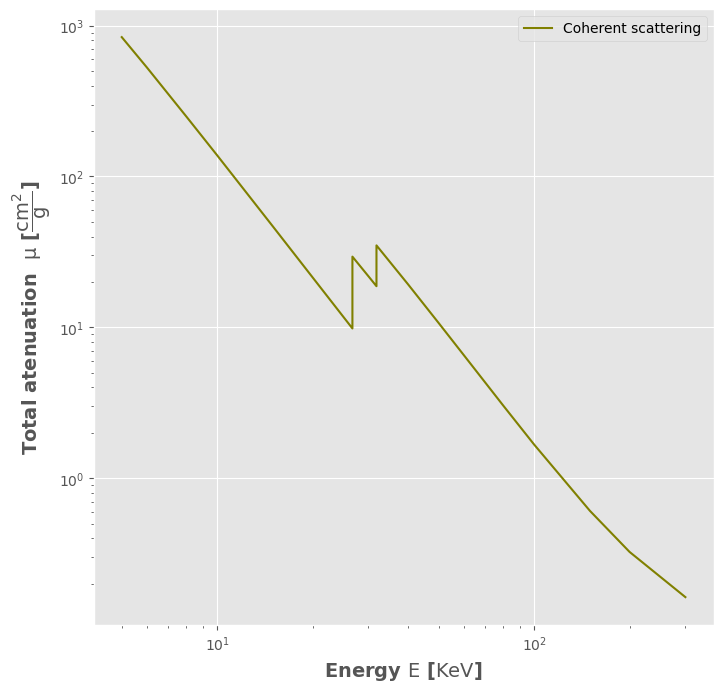

In [2]:
'''
FIRST WE EXTRACT THE DATA (FOR THE COMPOSITION OF OUR DETECTOR), IN THIS CASE FROM THE WEBSITE: 
https://physics.nist.gov/cgi-bin/Xcom/xcom2?Method=Comp&Output2=Hand

THE APPROPRIATE PARAMETERS ARE SELECTED ON THIS WEBSITE: ALL GRAPH OPTIONS, 
ENERGY RANGE: 0.005 - 0.300 KeV (we put 300 for later data extrapolation). 
AS A FINAL STEP WE DOWNLOAD THE DATA
'''
energy, mu = np.loadtxt("CdTe_data.txt", unpack="True", skiprows=2, usecols=(0,6)) #WE EXTRACT THE NECESSARY DATA FROM THE ENERGY AND ATTENUATION COEFFICIENT COLUMNS 


#THE NEXT STEP IS TO CHANGE UNITS: MeV TO KeV

energy=energy*1000

#YOU CAN PRINT BOTH VARIABLES TO SEE THAT EVERYTHING IS CORRECT.

print(energy)  
print(mu)

#WE PLOT THE DATA ON A GRAPH

plt.figure(figsize=(8,8))
plt.xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('Total atenuation  $\mathrm{\mu}$ [$\mathrm{\dfrac{cm^{2}}{g}}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.plot(energy, mu, label='Coherent scattering', color = 'olive') 
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='best')

## **DATA INTERPOLATION**

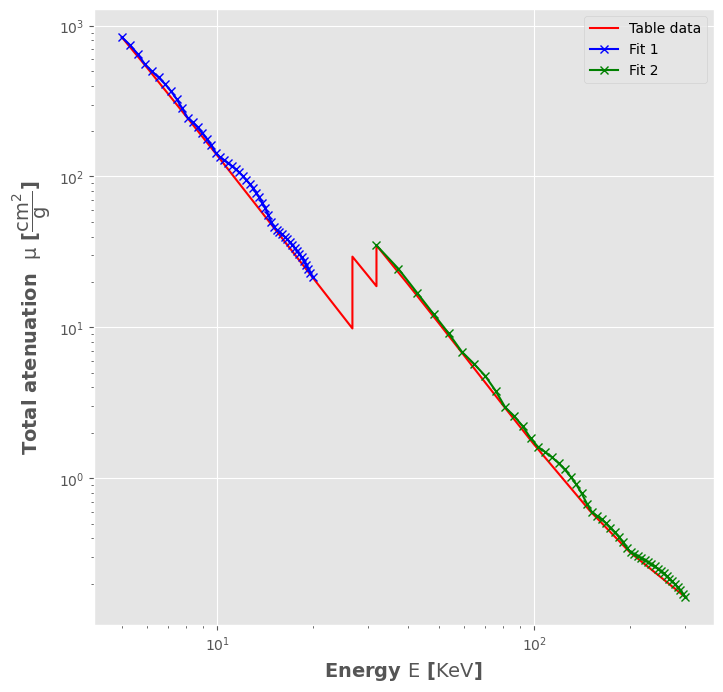

In [3]:
'''
NOW WE DEFINE THE AREAS TO BE INTERPOLATED. IN THIS CASE WE CHOOSE THOSE TO THE RIGHT AND LEFT OF THE K-EDGE. 
OUR INTEREST IS TO INTERPOLATE AS MANY POINTS AS POSSIBLE TO OBTAIN VALUES OF THE ATTENUATION COEFFICIENT 
THAT IS NOT IN OUR ORIGINAL SAMPLE.

'''
'''
WE DEFINE THE INTERVALS TO BE INTERPOLATED (THIS MUST BE DONE VISUALLY, 
MAKING SURE THAT THE VALUES ARE NOT CLOSE TO THE K-EDGE).

'''

xvals1 = np.linspace(energy[0],energy[5], 50)
yinterp1 = np.interp(xvals1, energy, mu)

xvals2 = np.linspace(energy[10],energy[-1], 50)
yinterp2 = np.interp(xvals2, energy, mu)


#NOW WE PLOT THE DATA ON A GRAPH


plt.figure(figsize=(8,8))
plt.plot(energy, mu, 'r-', label='Table data')
plt.plot(xvals1, yinterp1, 'bx-', label='Fit 1')
plt.plot(xvals2, yinterp2, 'gx-', label='Fit 2')
plt.xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('Total atenuation  $\mathrm{\mu}$ [$\mathrm{\dfrac{cm^{2}}{g}}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.legend()
plt.xscale('log')
plt.yscale('log')

In [4]:
'''
NOW WE PUT TOGETHER THE DATA FROM FIT 1 AND FIT 2 IN A SINGLE ARRAY

'''

# Concatenate x_interpolation arrays.
x_interpolation = np.concatenate((xvals1, xvals2))

# Concatenate y_interpolation arrays.
y_interpolation = np.concatenate((yinterp1, yinterp2))

#WE PRINT THE RESULTS

print("ENERGY VALUES:")
print(x_interpolation)

print("\nATENUATION COEFFICIENT INYERPOLATED:")
print(y_interpolation)

ENERGY VALUES:
[  5.           5.30612245   5.6122449    5.91836735   6.2244898
   6.53061224   6.83673469   7.14285714   7.44897959   7.75510204
   8.06122449   8.36734694   8.67346939   8.97959184   9.28571429
   9.59183673   9.89795918  10.20408163  10.51020408  10.81632653
  11.12244898  11.42857143  11.73469388  12.04081633  12.34693878
  12.65306122  12.95918367  13.26530612  13.57142857  13.87755102
  14.18367347  14.48979592  14.79591837  15.10204082  15.40816327
  15.71428571  16.02040816  16.32653061  16.63265306  16.93877551
  17.24489796  17.55102041  17.85714286  18.16326531  18.46938776
  18.7755102   19.08163265  19.3877551   19.69387755  20.
  31.81        37.28326531  42.75653061  48.22979592  53.70306122
  59.17632653  64.64959184  70.12285714  75.59612245  81.06938776
  86.54265306  92.01591837  97.48918367 102.96244898 108.43571429
 113.90897959 119.3822449  124.8555102  130.32877551 135.80204082
 141.27530612 146.74857143 152.22183673 157.69510204 163.16836735
 168

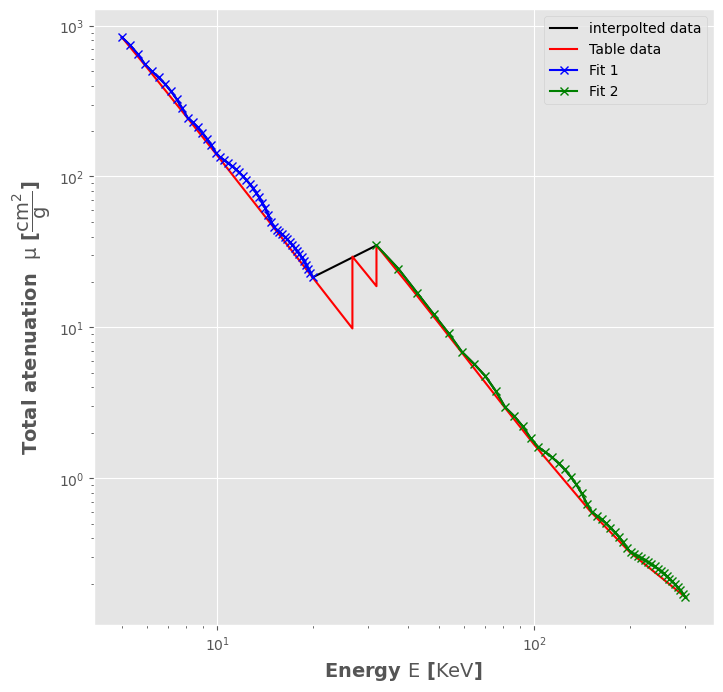

In [5]:
#WE NOW REPRESENT THE EXTRAPOLATION AND THE ORIGINAL DATA

plt.figure(figsize=(8,8))
plt.plot(x_interpolation, y_interpolation, 'k-', label = 'interpolted data')
plt.plot(energy, mu, 'r-', label='Table data')
plt.plot(xvals1, yinterp1, 'bx-', label='Fit 1')
plt.plot(xvals2, yinterp2, 'gx-', label='Fit 2')
plt.xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('Total atenuation  $\mathrm{\mu}$ [$\mathrm{\dfrac{cm^{2}}{g}}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.legend()
plt.xscale('log')
plt.yscale('log')

## **Efficiency**

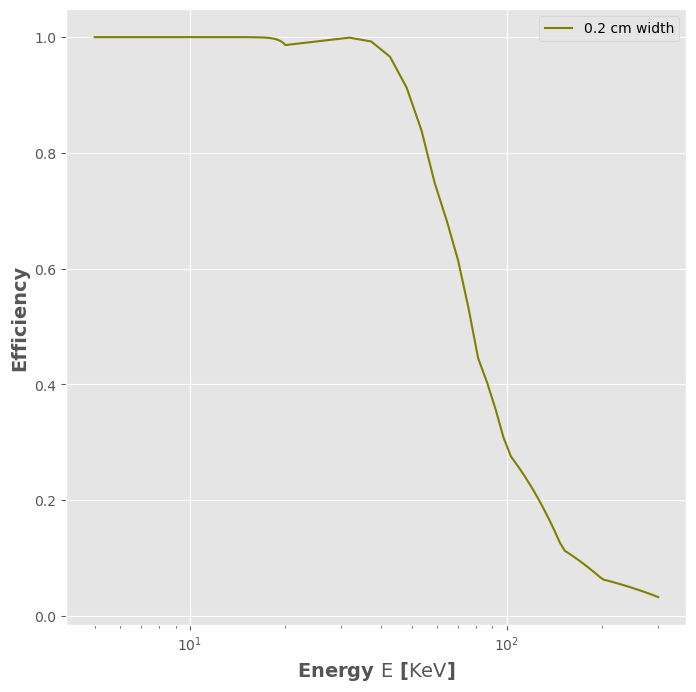

In [6]:
#WE THEN CALCULATE THE EFFICIENCY OF OUR DETECTOR:

#NOW WE CALCULATE THE EFFICIENCY: e(E) = ( 1 - e^{- u * mu} )
#WE CHANGE THE NAME OF THE VARIABLES IN ORDER TO MAKE THEM EASIER TO UNDERSTAND

energy_1 = x_interpolation
mu_1 = y_interpolation

x = 0.2 #THICKNESS (IN CM) OF THE CdTe DETECTOR

efficiency = 1 - np.e**(-x * mu_1) #EFFICIENCY FUNCTION

#REPRESENTING ENERGY EFFICIENCY

plt.figure(figsize=(8,8))
plt.xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('Efficiency', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.plot(energy_1, efficiency, label='0.2 cm width', color = 'olive') 
plt.xscale('log')
#plt.yscale('log')
plt.legend(loc='best')

## **Background Noise: Aperture Leakage**

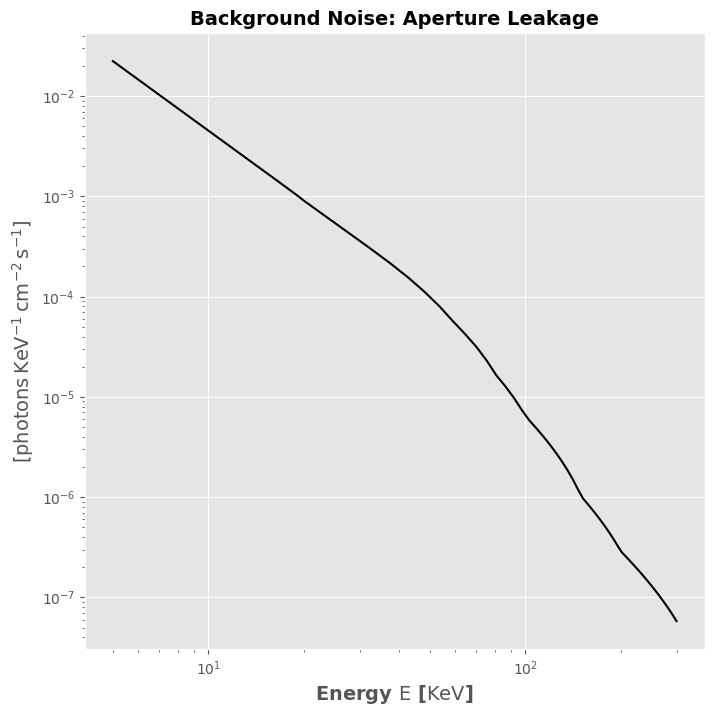

In [7]:
#NOW WE CALCULATE BACKGROUND NOISE: APERTURE LEAKAGE

#FOR THIS STEP, WE NEED THE OMEGA ANGLE (SOLID ANGLE OF THE APERTURE, IN OUR CASE FOR AN ANGLE OF. 35°).

#then we switch from degrees to steroradians

#35º = 35*(pi/180)**2 = 0.0101066

angle = 35
omega = angle*(np.pi/180)**2
back_aperture = omega*84.7* efficiency * energy_1**(-2.3)


#WE REPRESENT THE BACK APERTURE AS A FUNCTION OF ENERGY

plt.figure(figsize=(8,8))
plt.title('Background Noise: Aperture Leakage', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('$\mathrm{[photons \, KeV^{-1} \, cm^{-2} \, s^{-1} ]}$', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.plot(energy_1, back_aperture, color = 'black') 
plt.xscale('log')
plt.yscale('log')

## **Background Noise: Shield Leakage**

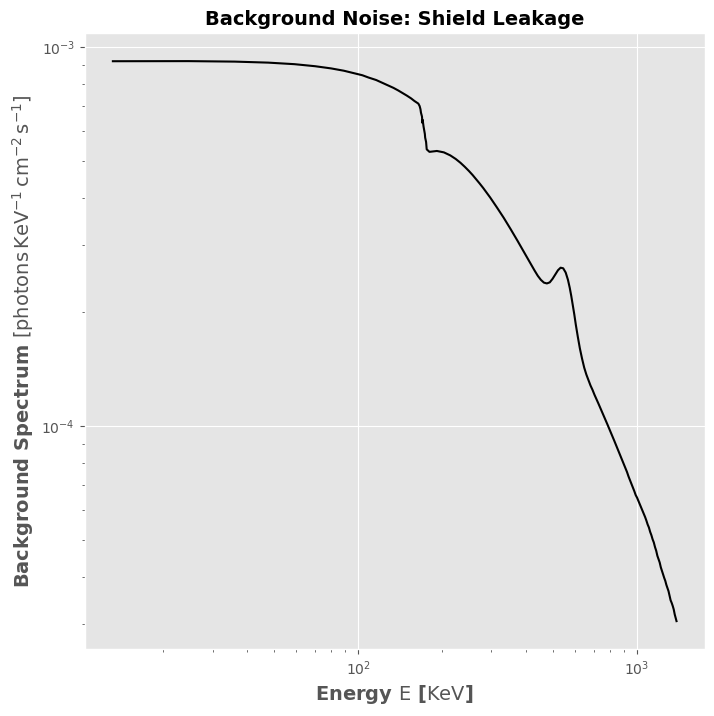

In [8]:
#WE EXTRACT THE NECESSARY DATA FROM THE ENERGY AND background spectrum 

energy2, b_5cm = np.loadtxt('shield_leakage_background_CsI_Tl_5cm.txt', unpack=True) 

#b_5cm is the background spectrum, taken from Figure 8. It refers to a 5 cm thick CsI(Tl) Veto shield.

#NOW WE REPRESENT THE DATA

plt.figure(figsize=(8,8))
plt.title('Background Noise: Shield Leakage', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('Background Spectrum $\mathrm{[photons \, KeV^{-1} \, cm^{-2} \, s^{-1} ]}$', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.plot(energy2, b_5cm , color = 'black') 
plt.xscale('log')
plt.yscale('log')


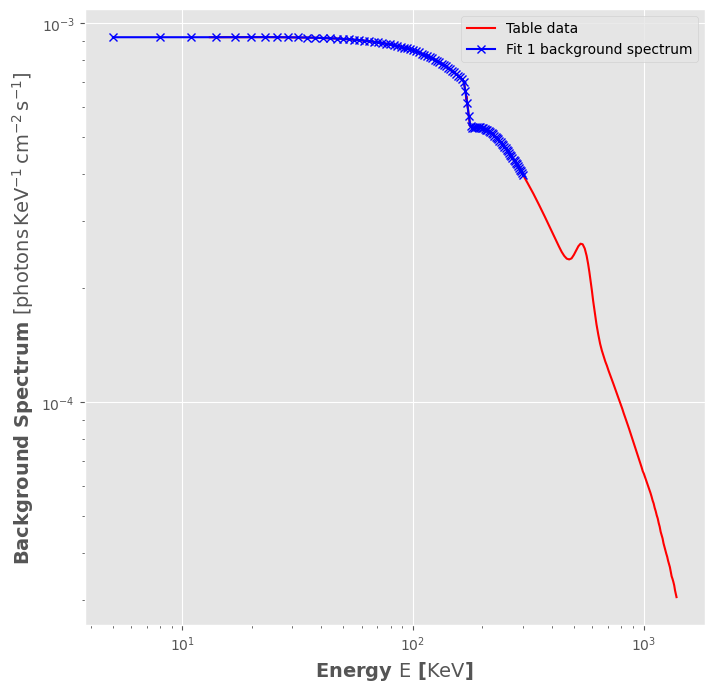

In [9]:
'''
TO MAKE A COMBINATION WITH THE DATA FOUND ABOVE, THE BACKGROUND HAS TO BE CALCULATED FOR THE 
ENERGY VALUES OF THE PRINCIPLE. FOR THIS WE MAKE USE OF THE INTERPOLATION.

'''

interval_x = np.linspace(energy_1[0],energy_1[-1], 100)
interval_y = np.interp(interval_x, energy2, b_5cm)

energy_2_modified = interval_x
b_5cm_modified = interval_y


#NOW WE PLOT THE DATA ON A GRAPH


plt.figure(figsize=(8,8))
plt.plot(energy2, b_5cm, 'r-', label='Table data')
plt.plot(interval_x, interval_y, 'bx-', label='Fit 1 background spectrum')
#plt.plot(interval_x_2, interval_y_2, 'gx-', label='Fit 2')
plt.xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('Background Spectrum $\mathrm{[photons \, KeV^{-1} \, cm^{-2} \, s^{-1} ]}$', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.legend()
plt.xscale('log')
plt.yscale('log')


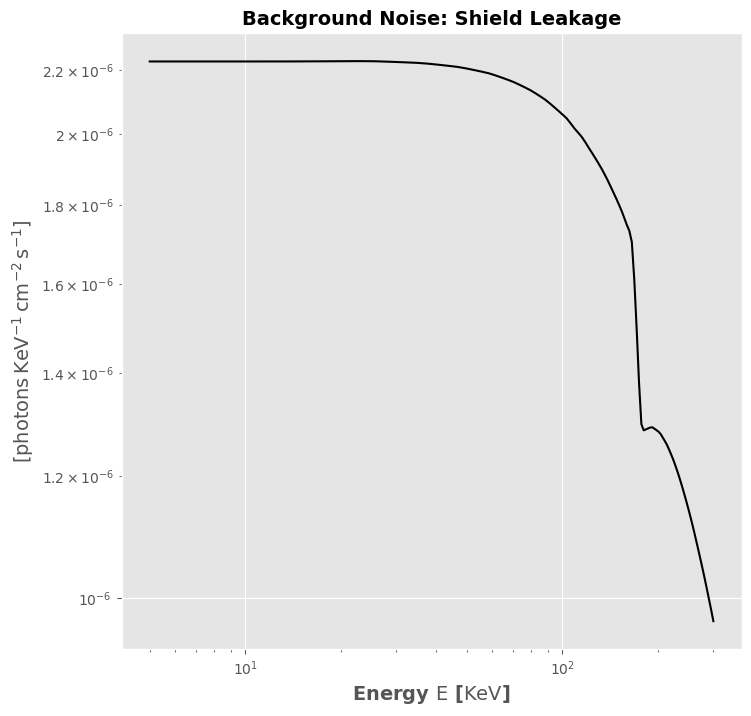

In [10]:
#WE NOW CALCULATE THE TOTAL CONTRIBUTION, USING THE EXPRESSION:

# B_{I} = e^{1- (x/5)} * 10^{-3} * B_{PH5CM}(E)

#THE FACTOR 10^{-3} IS DUE TO THE UNITS IN THE TABLE. PLEASE SEE COMPENDIUM, PAGE 175
shield = 5 #thickness of the shield in cm ( this data is invented)
area_detector =   10000  #area of detector to be used as shield (APPROXIMATE)
component_density = 4.59 #density of the material to be used as shield

#0.5-2 m^^2 mas o menos el rango DE SUPERFICIE

sigma_shield = 1.25 #esto es de las presentaciones de pablo (sigma shield thickness)
sigma_area = 825 #cm^2
NaI_density = 3.67

correction_factor = ( (x * area_detector * component_density) / ( sigma_shield  * sigma_area * NaI_density) )

#WE NEED THE CORECTION FACTOR BECAUSE WE DON'T HAVE THIS TABLE FOR OTHER MATERIAL, 
#SO IT IS DERIVED FROM THIS BY A LAW OF PROPORTIONALITY. THIS IS ATTACHED IN THE DRIVE/GITHUB

b_i =  correction_factor * b_5cm_modified * np.e**( 1 - (shield/5)) *10**(-3) 


#WE REPRESENT THE DATA

plt.figure(figsize=(8,8))
plt.title('Background Noise: Shield Leakage', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('$\mathrm{[photons \, KeV^{-1} \, cm^{-2} \, s^{-1} ]}$', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.plot(energy_2_modified , b_i, color = 'black') 
plt.xscale('log')
plt.yscale('log')


## **Background Noise: Neutron and Spallation**

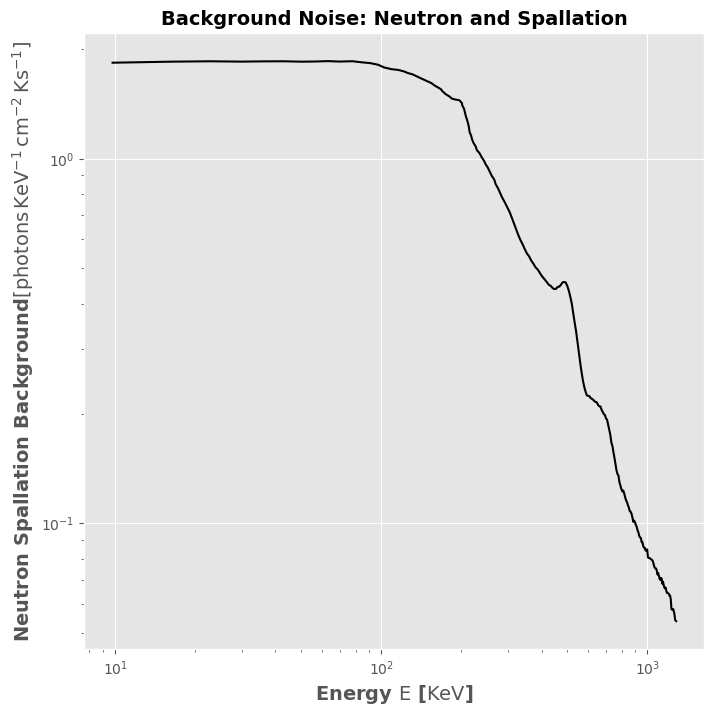

In [11]:
'''
FOR THIS STEP IS THE SAME AS THE PREVIOUS ONE: LOAD THE TABLES AND INTERPOLATE TO OBTAIN THE BACKGROUND VALUE.

'''

energy3, b_fig = np.loadtxt('neutron_spallation_background_NaI_Tl_2cm_4p7GV.txt', unpack=True)
#LATER IT WILL BE MULTIPLIED BY 10^{-3} BECAUSE IT IS IN KILOSECONDS, 
#THAT'S WHY WHEN SWITCHING TO SECONDS THIS FACTOR IS INTRODUCED

#NOW WE REPRESENT THE DATA

plt.figure(figsize=(8,8))
plt.title('Background Noise: Neutron and Spallation', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('Neutron Spallation Background$\mathrm{[photons \, KeV^{-1} \, cm^{-2} \, Ks^{-1} ]}$', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.plot(energy3, b_fig , color = 'black') 
plt.xscale('log')
plt.yscale('log')

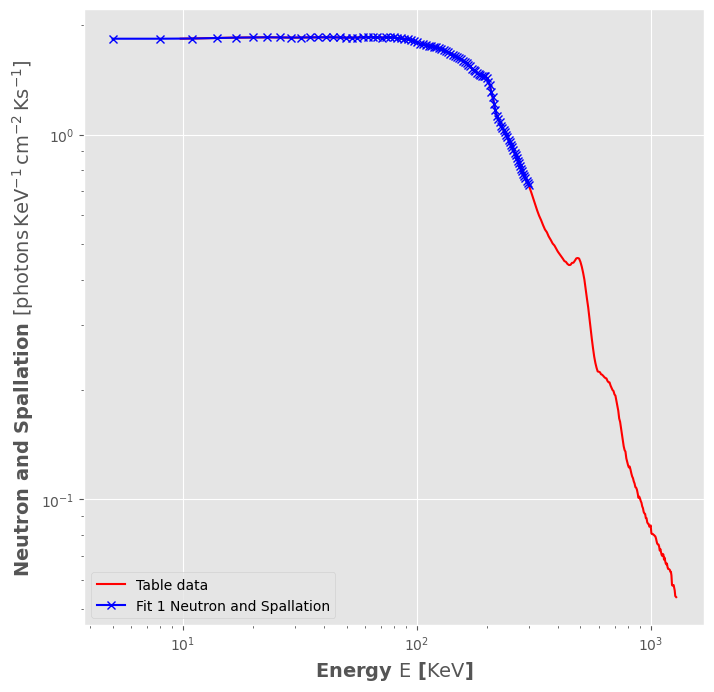

In [12]:
#AS IN THE PREVIOUS STEP, WE PROCEED WITH INTERPOLATION.

interval_x_2 = np.linspace(energy_1[0],energy_1[-1], 100)
interval_y_2 = np.interp(interval_x_2, energy3, b_fig)

energy_3_modified = interval_x_2
b_fig_modified = interval_y_2


#NOW WE PLOT THE DATA ON A GRAPH


plt.figure(figsize=(8,8))
plt.plot(energy3, b_fig, 'r-', label='Table data')
plt.plot(interval_x_2, interval_y_2, 'bx-', label='Fit 1 Neutron and Spallation')
#plt.plot(interval_x_2, interval_y_2, 'gx-', label='Fit 2')
plt.xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('Neutron and Spallation $\mathrm{[photons \, KeV^{-1} \, cm^{-2} \, Ks^{-1} ]}$', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.legend()
plt.xscale('log')
plt.yscale('log')


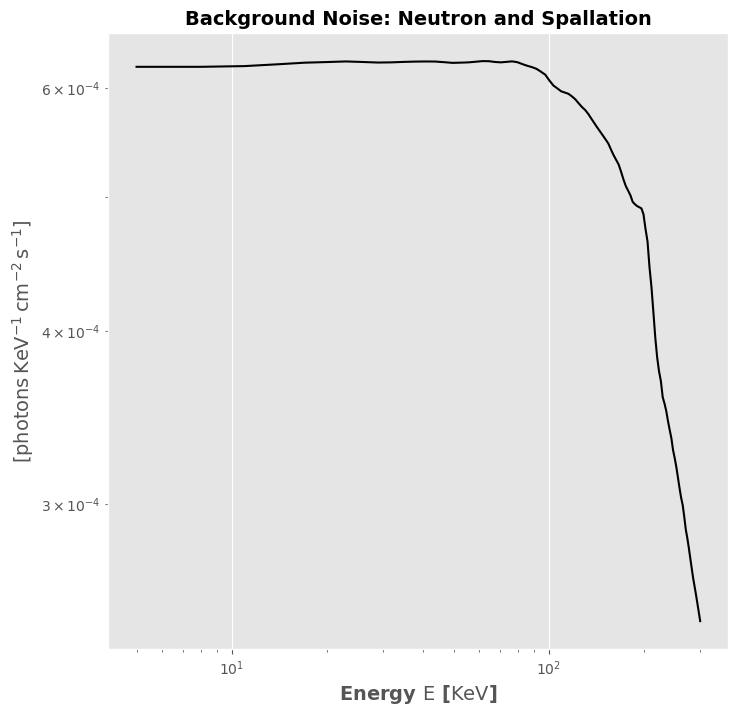

In [21]:
corr_rig = 1.4   # RIGIDITY CORRECTION (if LEO to be calculated with R_C = 15.6 * L^-2, SEE PAGE 174 COMPENDIUM)
corr_mat = x / 2  # detector material correction
b_ns = corr_rig * corr_mat * b_fig_modified*10**(-3)* correction_factor


plt.figure(figsize=(8,8))
plt.title('Background Noise: Neutron and Spallation', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('$\mathrm{[photons \, KeV^{-1} \, cm^{-2} \, s^{-1} ]}$', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.plot(energy_3_modified, b_ns, color = 'black') 
plt.xscale('log')
plt.yscale('log')
#plt.legend(loc='best')

## **ALL CONTRIBUTIONS**

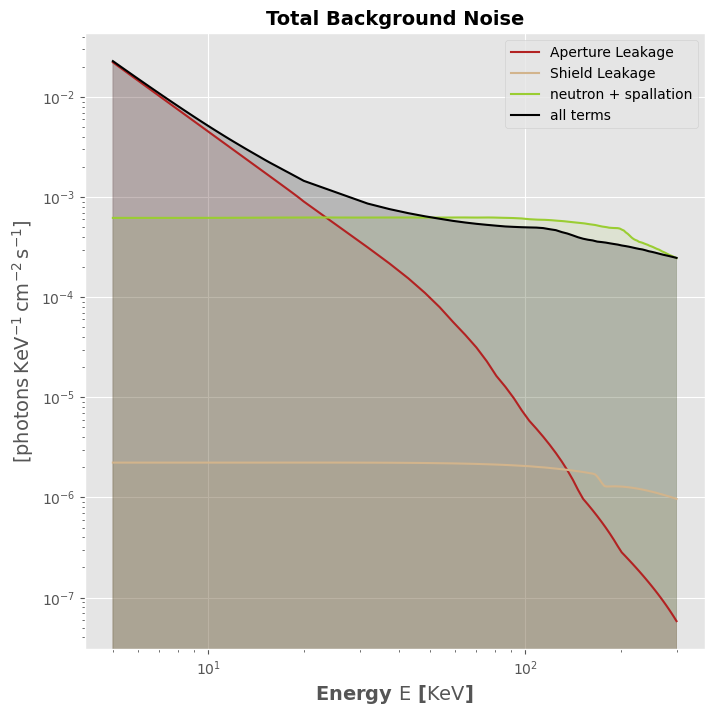

In [20]:
# WE ADD UP ALL THE CONTRIBUTIONS OF THE DIFFERENT EFFECTS TO SEE THE TOTAL RESPONSE.

plt.figure(figsize=(8,8))
plt.title('Total Background Noise', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('$\mathrm{[photons \, KeV^{-1} \, cm^{-2} \, s^{-1} ]}$', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.plot(energy_1, back_aperture, label='Aperture Leakage', color = 'firebrick') 
plt.plot(energy_2_modified , b_i, label='Shield Leakage', color = 'tan') 
plt.plot(energy_3_modified, b_ns, label='neutron + spallation', color = 'yellowgreen')
plt.plot(energy_1, b_ns + b_i + back_aperture, label='all terms', color = 'black')


plt.fill_between(energy_1, back_aperture, color = 'firebrick', alpha=0.1)
plt.fill_between(energy_2_modified , b_i, color = 'tan', alpha=0.1)
plt.fill_between(energy_3_modified, b_ns, color = 'yellowgreen', alpha=0.1)
plt.fill_between(energy_1, b_ns + b_i + back_aperture, color = 'black', alpha=0.2)

plt.xscale('log')
plt.yscale('log')
plt.legend(loc='best')

## **Sensitivity curve**

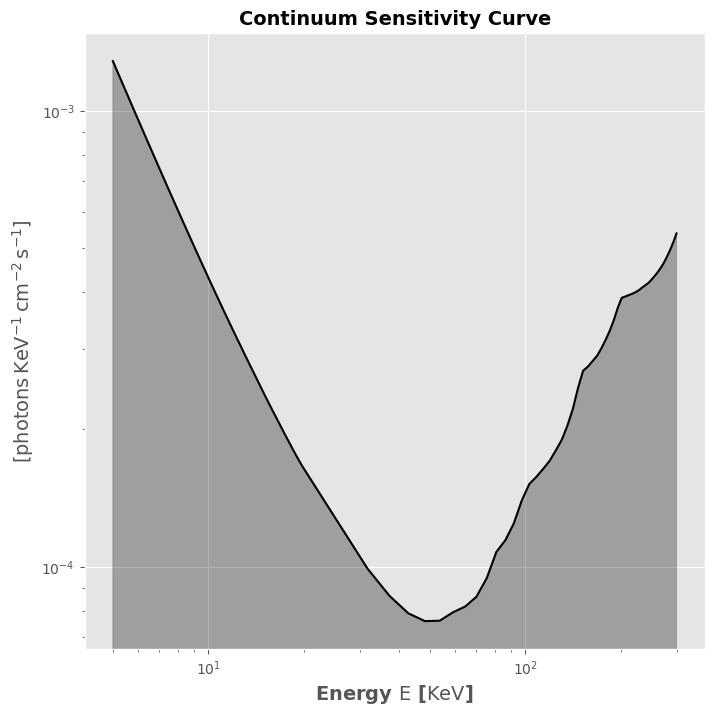

In [24]:
b_t = b_ns + b_i + back_aperture

# FUNCIÓN DE SENSIBILIDAD 
sigma = 3
A = area_detector    # ÁREA DEL SENSOR (CREO)
T = 10e0
f_min = (sigma / efficiency) * np.sqrt( (4 * b_t) / (A * T * energy_1) )

plt.figure(figsize=(8,8))
plt.title('Continuum Sensitivity Curve', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Energy $\mathrm{E}$ [$\mathrm{KeV}$]', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel('$\mathrm{[photons \, KeV^{-1} \, cm^{-2} \, s^{-1} ]}$', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.plot(energy_1, f_min, 'black')
plt.fill_between(energy_1, f_min, color='black', alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [16]:
b_ns + b_i + back_aperture

array([0.02291208, 0.02006486, 0.01771264, 0.01574963, 0.01409505,
       0.01268785, 0.01148257, 0.01044186, 0.00953844, 0.00875035,
       0.0080589 , 0.00744882, 0.00690802, 0.00642652, 0.00599565,
       0.00560914, 0.00526213, 0.00494888, 0.00466555, 0.00440828,
       0.00417328, 0.00395794, 0.00376116, 0.0035815 , 0.00341634,
       0.00326284, 0.00311989, 0.00298778, 0.00286555, 0.00275164,
       0.00264439, 0.00254425, 0.00244767, 0.00235795, 0.0022759 ,
       0.00219888, 0.00212806, 0.00206146, 0.0019974 , 0.00193655,
       0.00187801, 0.00182283, 0.00177109, 0.00172097, 0.00167243,
       0.00162623, 0.00158198, 0.00153963, 0.0014987 , 0.00145881,
       0.0008645 , 0.00076094, 0.00069288, 0.00064478, 0.00060944,
       0.00058007, 0.00055872, 0.00054226, 0.00052977, 0.00051925,
       0.00051022, 0.00050538, 0.00050145, 0.00049897, 0.00049709,
       0.00049151, 0.00047898, 0.00046863, 0.00044841, 0.00043356,
       0.00041539, 0.00039783, 0.00038484, 0.000376  , 0.00036

In [17]:
b_ns

array([0.00062164, 0.00062164, 0.00062239, 0.00062427, 0.00062592,
       0.00062659, 0.00062723, 0.00062666, 0.00062609, 0.00062628,
       0.00062676, 0.00062707, 0.00062721, 0.00062714, 0.00062645,
       0.00062576, 0.00062598, 0.00062626, 0.0006269 , 0.00062757,
       0.0006275 , 0.00062668, 0.00062628, 0.0006268 , 0.00062731,
       0.00062646, 0.00062445, 0.0006227 , 0.00062129, 0.00061952,
       0.00061654, 0.00061352, 0.00060755, 0.0006025 , 0.00059962,
       0.00059676, 0.0005955 , 0.00059425, 0.00059167, 0.00058872,
       0.00058481, 0.00058125, 0.00057836, 0.00057456, 0.00057006,
       0.00056584, 0.00056174, 0.00055795, 0.00055426, 0.00055059,
       0.00054692, 0.00054142, 0.00053646, 0.00053227, 0.00052819,
       0.00052179, 0.00051506, 0.00050938, 0.00050552, 0.00050159,
       0.00049619, 0.00049428, 0.00049276, 0.00049185, 0.00049094,
       0.00048618, 0.00047434, 0.00046458, 0.00044485, 0.00043043,
       0.00041263, 0.00039539, 0.00038263, 0.00037392, 0.00036